## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [2]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

Load dataset

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/ihavenonamesad/Covid-19_Dataset/refs/heads/main/COVID-19%20Coronavirus.csv')

df.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [37]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


1.

In [12]:
df.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

2.

In [13]:
(df.isna().sum()/len(df))*100

Country                    0.000000
Other names                0.444444
ISO 3166-1 alpha-3 CODE    0.000000
Population                 0.000000
Continent                  0.000000
Total Cases                0.000000
Total Deaths               0.000000
Tot Cases//1M pop          0.000000
Tot Deaths/1M pop          0.000000
Death percentage           0.000000
dtype: float64

Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [14]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [15]:
df_imputed.isna().sum()

Country                    0
Other names                0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

Drop the column 'Nama Daerah' because all the values are different.

In [16]:
df_dropped = df_imputed.drop('ISO 3166-1 alpha-3 CODE', axis=1) 
df_dropped = df_dropped.drop('Other names', axis=1) 
df_dropped.head(5)

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,34654212,Africa,99194,1900,2862,55,1.915438


3.

In [18]:
label_encoders = {}
categorical_cols = ['Country','Continent']
for col in categorical_cols:
    le = LabelEncoder()
    df_dropped[col] = le.fit_transform(df_dropped[col])
    label_encoders[col] = le

df_dropped.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0,40462186,1,177827,7671,4395,190,4.313743
1,1,2872296,2,273870,3492,95349,1216,1.275058
2,2,45236699,0,265691,6874,5873,152,2.587216
3,3,77481,2,40024,153,516565,1975,0.382271
4,4,34654212,0,99194,1900,2862,55,1.915438


check the data type

In [20]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            225 non-null    int32 
 1   Population         225 non-null    object
 2   Continent          225 non-null    int32 
 3   Total Cases        225 non-null    object
 4   Total Deaths       225 non-null    object
 5   Tot Cases//1M pop  225 non-null    object
 6   Tot Deaths/1M pop  225 non-null    object
 7   Death percentage   225 non-null    object
dtypes: int32(2), object(6)
memory usage: 12.4+ KB


In [21]:
df_encoded = df_dropped
df_encoded["Population"] = df_encoded["Population"].astype(int)
df_encoded["Total Cases"] = df_encoded["Total Cases"].astype(int)
df_encoded["Total Deaths"] = df_encoded["Total Deaths"].astype(int)
df_encoded["Death percentage"] = df_encoded["Death percentage"].astype(int)

df_encoded.iloc[:, 5] = df_encoded.iloc[:, 5].astype(float)
df_encoded.iloc[:, 6] = df_encoded.iloc[:, 6].astype(float)

C:\Users\ekasu\AppData\Local\Temp\ipykernel_8228\127773873.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.iloc[:, 5] = df_encoded.iloc[:, 5].astype(float)
C:\Users\ekasu\AppData\Local\Temp\ipykernel_8228\127773873.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.iloc[:, 6] = df_encoded.iloc[:, 6].astype(float)


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            225 non-null    int32  
 1   Population         225 non-null    int32  
 2   Continent          225 non-null    int32  
 3   Total Cases        225 non-null    int32  
 4   Total Deaths       225 non-null    int32  
 5   Tot Cases//1M pop  225 non-null    float64
 6   Tot Deaths/1M pop  225 non-null    float64
 7   Death percentage   225 non-null    int32  
dtypes: float64(2), int32(6)
memory usage: 8.9 KB


4.

In [35]:
# scaling data
sc = StandardScaler()
 
scaled = pd.DataFrame(sc.fit_transform(df_encoded), columns=
                      ["Country", 
                       "Population",  
                       "Continent", 
                       "Total Cases", 
                       "Total Deaths", 
                       "Tot Cases per 1M pop", 
                       "Tot Deaths per 1M pop", 
                       "Death percentage"
                      ])

scaled.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage
0,-1.724370,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.718056
1,-1.708974,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.005106
2,-1.693578,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.569282
3,-1.678181,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.579493
4,-1.662785,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,-0.005106


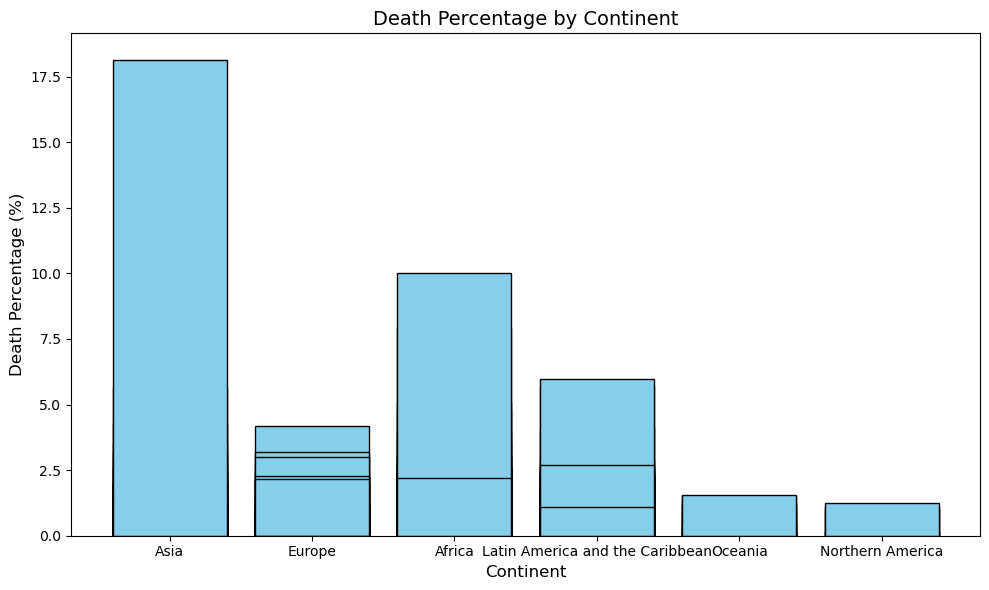

In [39]:
import matplotlib.pyplot as plt

# Create the bar chart using the DataFrame
plt.figure(figsize=(10, 6))
plt.bar(df_imputed['Continent'], df_imputed['Death percentage'], color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Continent", fontsize=12)
plt.ylabel("Death Percentage (%)", fontsize=12)
plt.title("Death Percentage by Continent", fontsize=14)
plt.ylim(0, df_imputed['Death percentage'].max() + 1)  # Add space above the highest bar for clarity

# Show the chart
plt.tight_layout()
plt.show()

C:\Users\ekasu\AppData\Local\Temp\ipykernel_8228\820230638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


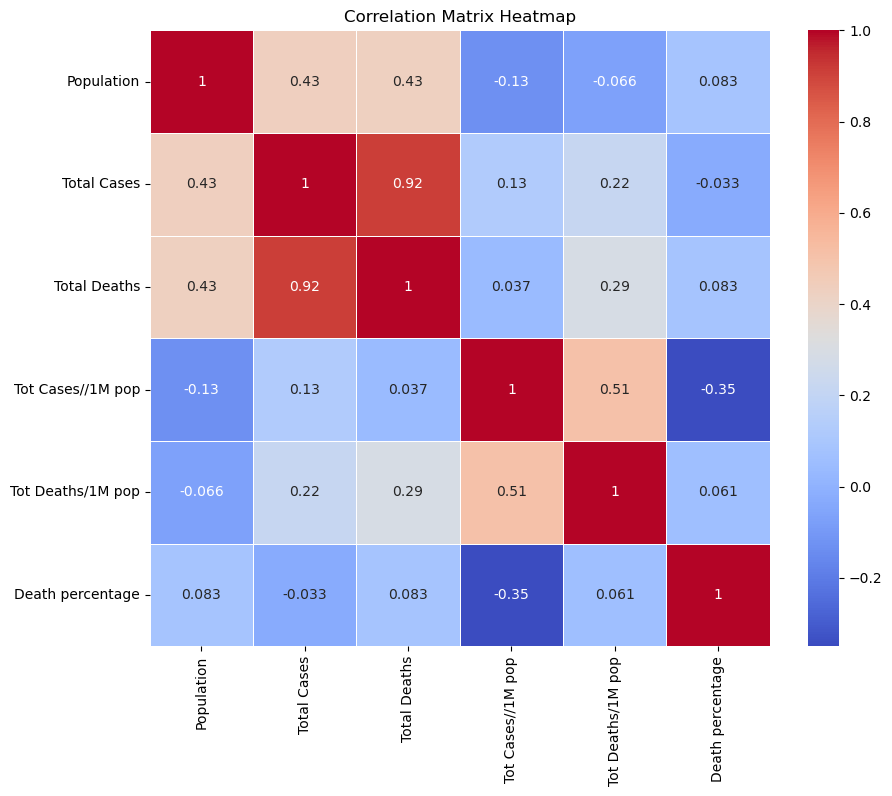

In [40]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

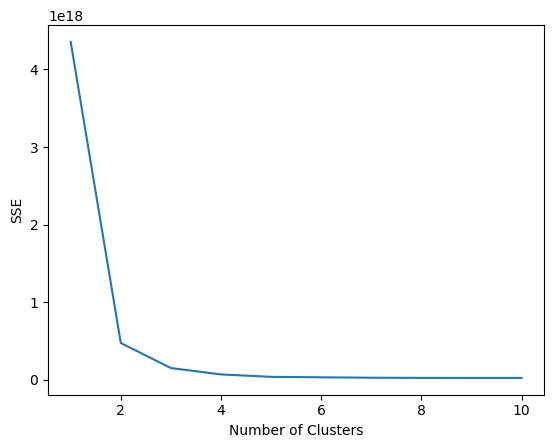

In [32]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [27]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 2


Train the K-Means model on the dataset with the number of clusters you have determined.

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random',max_iter=300,random_state=42)

y_pred = kmeans.fit_predict(df_encoded)

C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ekasu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
# Inverse transform the scaled data to get the original values
df_inv = pd.DataFrame(sc.inverse_transform(df_dropped),columns=["Country", 
                       "Population",  
                       "Continent", 
                       "Total Cases", 
                       "Total Deaths", 
                       "Tot Cases per 1M pop", 
                       "Tot Deaths per 1M pop", 
                       "Death percentage"
                      ])
                                                                
                                                                

df_inv['Cluster'] = y_pred

df_inv.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,Cluster
0,112.000000,5.621496e+15,3.223920,1.290982e+12,7.416307e+08,6.362588e+08,2.277772e+05,7.972833,1
1,176.951264,3.990541e+14,4.696728,1.988230e+12,3.376208e+08,1.380072e+10,1.451852e+06,2.749875,1
2,241.902528,6.284829e+15,1.751111,1.928853e+12,6.645797e+08,8.501810e+08,1.824411e+05,4.490861,1
3,306.853791,1.076463e+13,4.696728,2.905665e+11,1.481891e+07,7.476653e+10,2.357381e+06,1.008889,1
4,371.805055,4.814582e+15,1.751111,7.201259e+11,1.837123e+08,4.143760e+08,6.671476e+04,2.749875,1


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [30]:
# aggregation
cluster_summary = df_inv.groupby(y_pred).agg(
    {
        'Country': ['mean', 'std', 'min', 'max'],
        'Population': ['mean', 'std', 'min', 'max'],
        'Continent': ['mean', 'std', 'min', 'max'],
        'Total Cases': ['mean', 'std', 'min', 'max'],
        'Total Deaths': ['mean', 'std', 'min', 'max'],
        'Tot Cases per 1M pop': ['mean', 'std', 'min', 'max'],
        'Tot Deaths per 1M pop': ['mean', 'std', 'min', 'max'],
        'Death percentage': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary = cluster_summary.transpose()

cluster_summary

cluster                                0             1
Country               mean  4.463735e+03  7.412755e+03
                      std   2.296374e+03  4.235120e+03
                      min   2.839953e+03  1.120000e+02
                      max   6.087516e+03  1.466108e+04
Population            mean  1.974974e+17  3.145219e+15
                      std   3.494331e+15  6.346760e+15
                      min   1.950265e+17  1.118754e+11
                      max   1.999682e+17  4.645897e+16
Continent             mean  3.223920e+00  4.340084e+00
                      std   0.000000e+00  2.181224e+00
                      min   3.223920e+00  1.751111e+00
                      max   3.223920e+00  9.115155e+00
Total Cases           mean  1.567518e+14  1.459738e+13
                      std   2.200918e+14  4.915905e+13
                      min   1.123362e+12  9.444533e+06
                      max   3.123802e+14  5.941312e+14
Total Deaths          mean  2.542713e+10  2.449362e+09
                      std   3.532524e+10  8.842978e+09
                      min   4.484117e+08  2.744813e+04
                      max   5.040585e+10  9.747111e+10
Tot Cases per 1M pop  mean  2.226274e+09  1.997252e+10
                      std   3.126127e+09  2.102223e+10
                      min   1.576856e+07  1.439539e+06
                      max   4.436779e+09  1.007439e+11
Tot Deaths per 1M pop mean  2.241981e+05  1.319273e+06
                      std   3.104513e+05  1.429074e+06
                      min   4.675882e+03  1.096716e+03
                      max   4.437203e+05  7.500643e+06
Death percentage      mean  3.620368e+00  2.757682e+00
                      std   1.231063e+00  3.049235e+00
                      min   2.749875e+00  1.008889e+00
                      max   4.490861e+00  3.234664e+01

In [31]:
# count data from each cluster
df_inv.Cluster.value_counts()

1    223
0      2
Name: Cluster, dtype: int64

In [122]:
# write down your interpretation from the cluster that you have been made
print("")

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

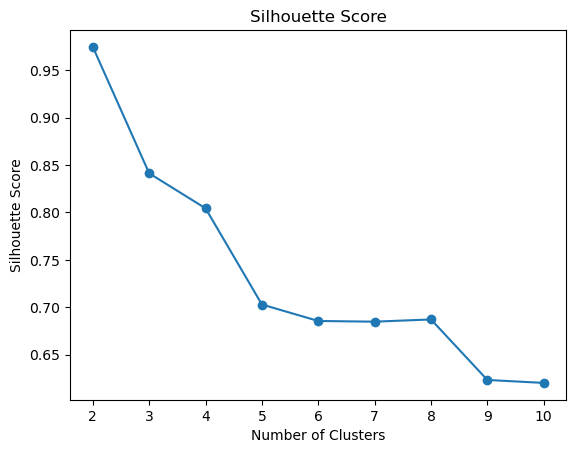

In [115]:
# The image below is not the final result, if yours looks different, that’s okay.
silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df_inv, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_inv, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [125]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_inv)

In [128]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df_imputed_inversed = pd.DataFrame(sc.inverse_transform(df_dropped),columns=["Country", 
                       "Population",  
                       "Continent", 
                       "Total Cases", 
                       "Total Deaths", 
                       "Tot Cases per 1M pop", 
                       "Tot Deaths per 1M pop", 
                       "Death percentage"
                      ])

df_imputed_inversed['KMeans'] = y_pred
df_imputed_inversed['Agglo'] = y_hc

# show the df
df_imputed_inversed.head()

,Country,Population,Continent,Total Cases,Total Deaths,Tot Cases per 1M pop,Tot Deaths per 1M pop,Death percentage,KMeans,Agglo
0,112.000000,5.621496e+15,3.223920,1.290982e+12,7.416307e+08,6.362588e+08,2.277772e+05,7.972833,1,0
1,176.951264,3.990541e+14,4.696728,1.988230e+12,3.376208e+08,1.380072e+10,1.451852e+06,2.749875,1,0
2,241.902528,6.284829e+15,1.751111,1.928853e+12,6.645797e+08,8.501810e+08,1.824411e+05,4.490861,1,0
3,306.853791,1.076463e+13,4.696728,2.905665e+11,1.481891e+07,7.476653e+10,2.357381e+06,1.008889,1,0
4,371.805055,4.814582e+15,1.751111,7.201259e+11,1.837123e+08,4.143760e+08,6.671476e+04,2.749875,1,0


Display the cluster summary in the form of a dataframe.

In [129]:
cluster_summary = df_inv.groupby(y_pred).agg(
    {
        'Country': ['mean', 'std', 'min', 'max'],
        'Population': ['mean', 'std', 'min', 'max'],
        'Continent': ['mean', 'std', 'min', 'max'],
        'Total Cases': ['mean', 'std', 'min', 'max'],
        'Total Deaths': ['mean', 'std', 'min', 'max'],
        'Tot Cases per 1M pop': ['mean', 'std', 'min', 'max'],
        'Tot Deaths per 1M pop': ['mean', 'std', 'min', 'max'],
        'Death percentage': ['mean', 'std', 'min', 'max']
    }
)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary = cluster_summary.transpose()

cluster_summary

cluster                                0             1
Country               mean  4.463735e+03  7.412755e+03
                      std   2.296374e+03  4.235120e+03
                      min   2.839953e+03  1.120000e+02
                      max   6.087516e+03  1.466108e+04
Population            mean  1.974974e+17  3.145219e+15
                      std   3.494331e+15  6.346760e+15
                      min   1.950265e+17  1.118754e+11
                      max   1.999682e+17  4.645897e+16
Continent             mean  3.223920e+00  4.340084e+00
                      std   0.000000e+00  2.181224e+00
                      min   3.223920e+00  1.751111e+00
                      max   3.223920e+00  9.115155e+00
Total Cases           mean  1.567518e+14  1.459738e+13
                      std   2.200918e+14  4.915905e+13
                      min   1.123362e+12  9.444533e+06
                      max   3.123802e+14  5.941312e+14
Total Deaths          mean  2.542713e+10  2.449362e+09
                      std   3.532524e+10  8.842978e+09
                      min   4.484117e+08  2.744813e+04
                      max   5.040585e+10  9.747111e+10
Tot Cases per 1M pop  mean  2.226274e+09  1.997252e+10
                      std   3.126127e+09  2.102223e+10
                      min   1.576856e+07  1.439539e+06
                      max   4.436779e+09  1.007439e+11
Tot Deaths per 1M pop mean  2.241981e+05  1.319273e+06
                      std   3.104513e+05  1.429074e+06
                      min   4.675882e+03  1.096716e+03
                      max   4.437203e+05  7.500643e+06
Death percentage      mean  3.620368e+00  2.757682e+00
                      std   1.231063e+00  3.049235e+00
                      min   2.749875e+00  1.008889e+00
                      max   4.490861e+00  3.234664e+01

Harga Penawaran (dari Owner)                                            \
                              mean           std           min           max   
Agglo                                                                          
0                     4.812799e+20  2.411640e+20  2.904276e+20  8.214951e+20   
1                     1.124542e+20  4.499939e+19  5.808551e+19  2.364910e+20   
2                     2.037581e+19  1.279467e+19  1.327669e+18  5.393655e+19   

      Terjual/Belum                Arah Hadap Rumah                      \
               mean  std  min  max             mean       std       min   
Agglo                                                                     
0               0.0  0.0  0.0  0.0         4.171431  1.427531  2.152597   
1               0.0  0.0  0.0  0.0         4.448525  0.990637  2.152597   
2               0.0  0.0  0.0  0.0         4.303094  1.022739  2.152597   

                Posisi Rumah                                \
            max         mean       std       min       max   
Agglo                                                        
0      5.180847     2.925980  0.189900  2.831030  3.210831   
1      5.180847     2.875713  0.210055  2.071429  3.590632   
2      5.180847     2.853548  0.126850  2.071429  3.590632   

      Lebar Jalan Depan Rumah (ROW)                                
                               mean       std       min       max  
Agglo                                                              
0                          1.744605  1.103482  0.788961  2.700248  
1                          1.763343  0.964967  0.788961  2.700248  
2                          1.495306  0.898538  0.788961  2.700248

In [130]:
df_imputed_inversed.Agglo.value_counts()

0    206
1     12
2      5
3      2
Name: Agglo, dtype: int64

In [131]:
# write down your interpretation from the cluster that you have been made
print("")

**Hierarchical Visualization**

Single Linkage

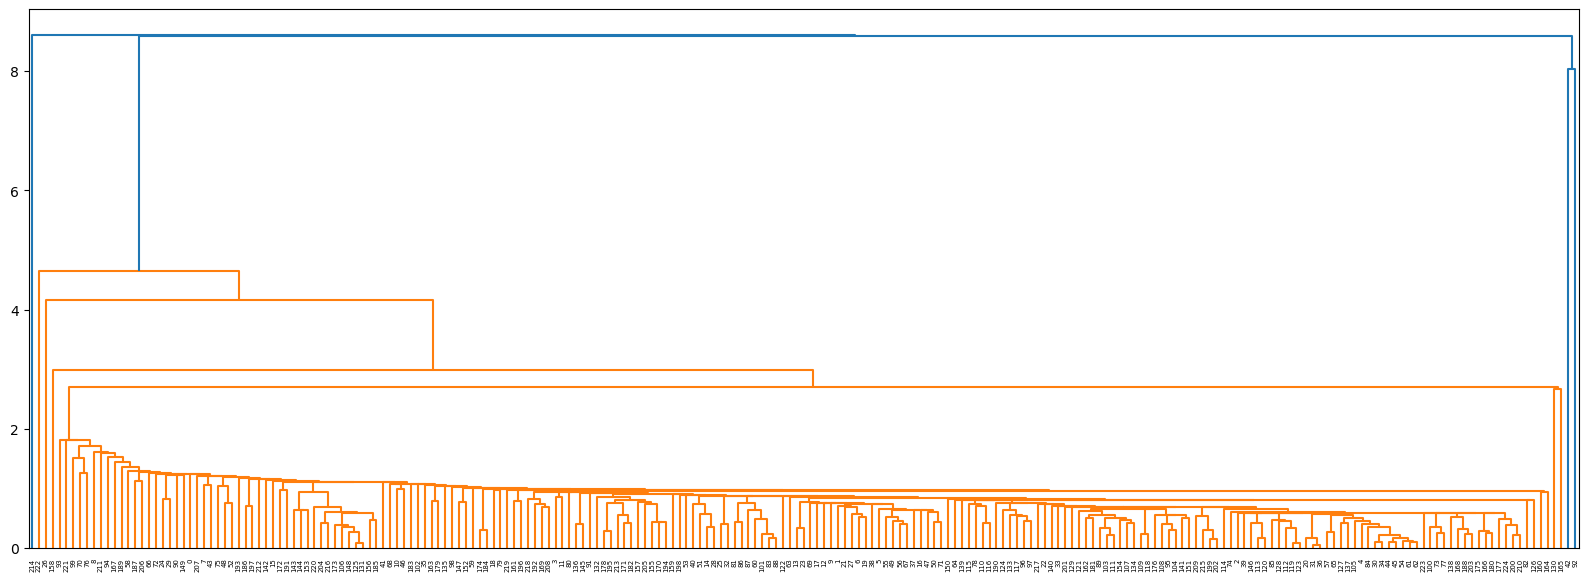

In [132]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='single')
dendrogram(linkage_data)
plt.show()

complete linkage

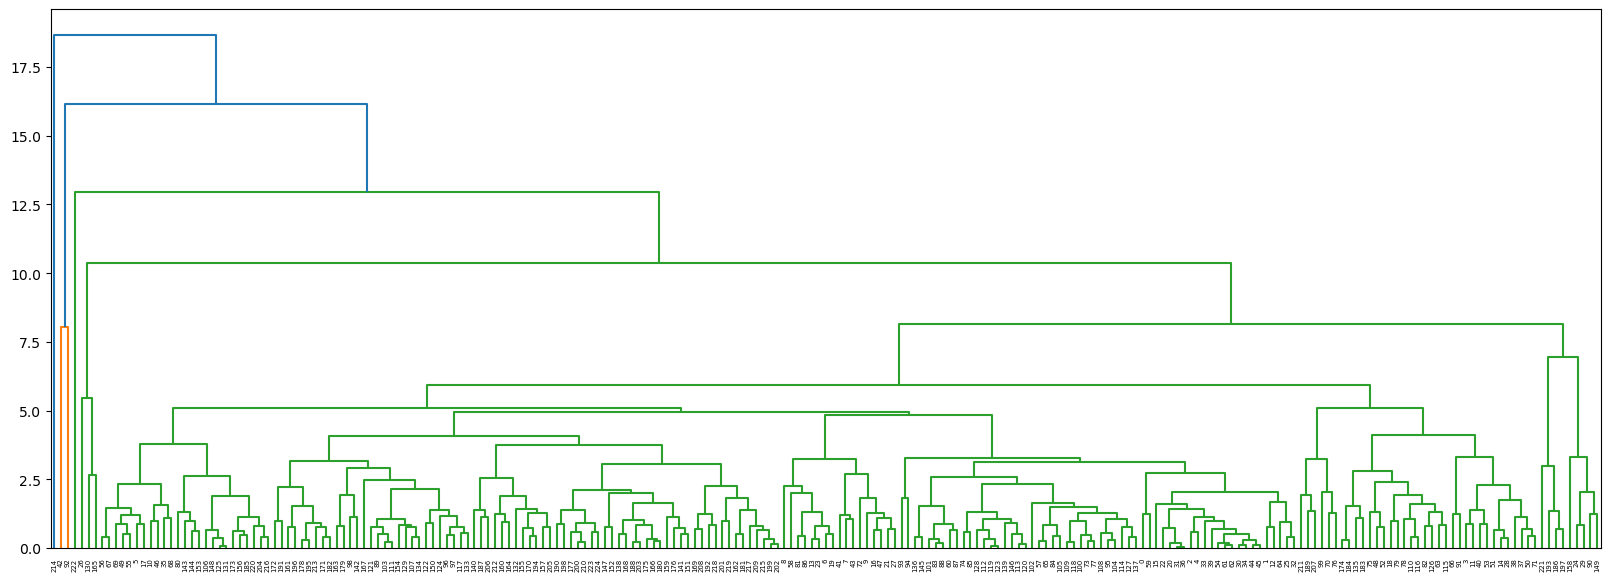

In [133]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='complete')
dendrogram(linkage_data)
plt.show()

average linkage

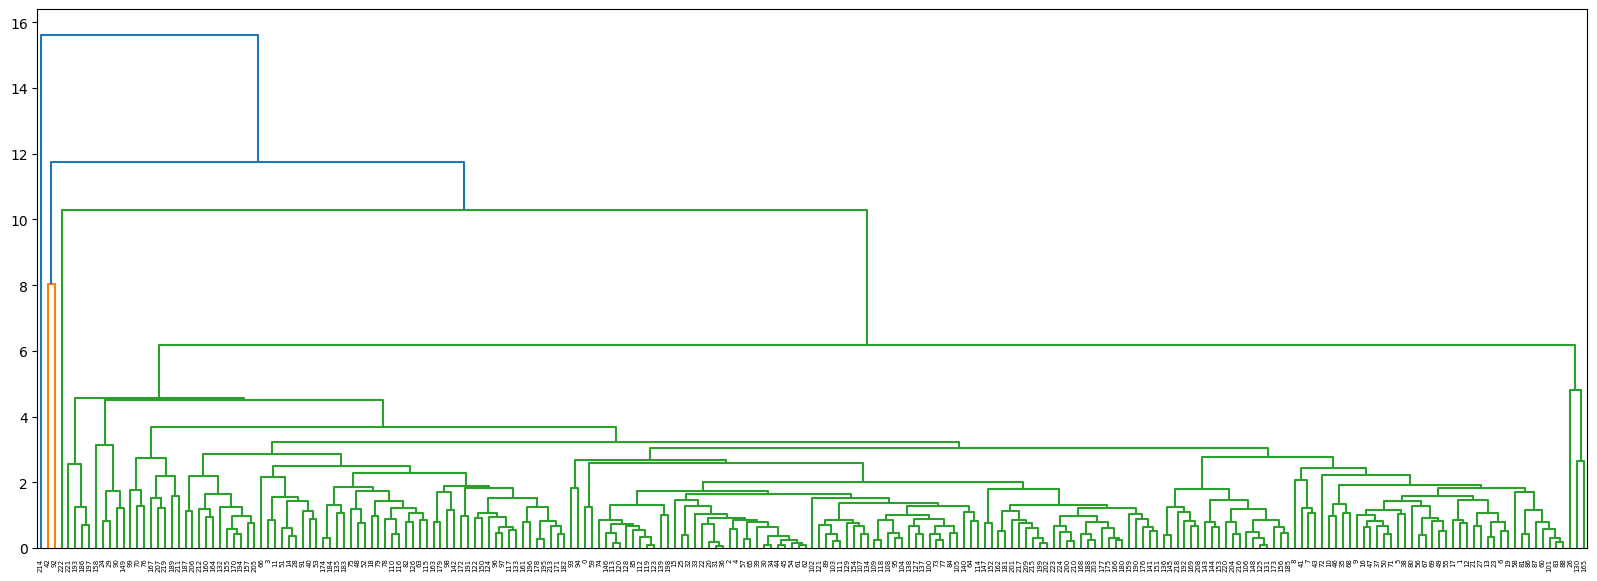

In [134]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='average')
dendrogram(linkage_data)
plt.show()

ward method

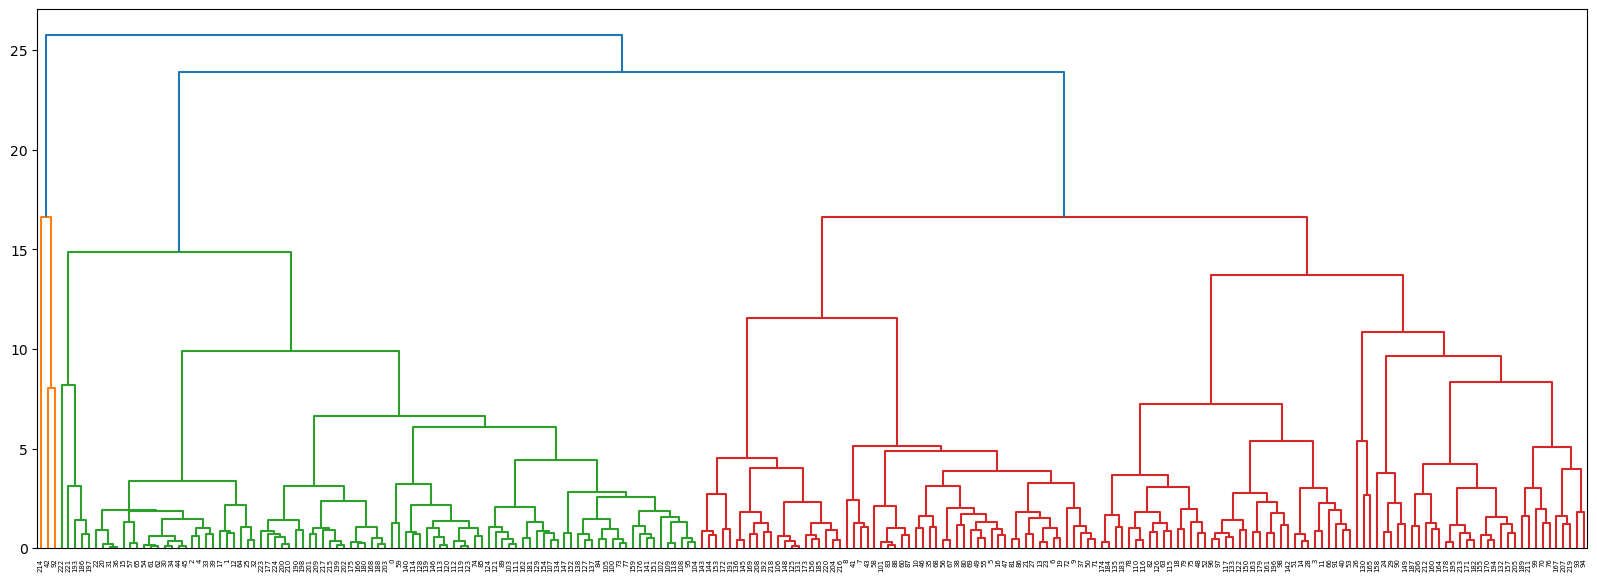

In [135]:
plt.figure(figsize=(20,7))
linkage_data = linkage(scaled, method='ward')
dendrogram(linkage_data)
plt.show()